## 8-5. Naive Bayes Classifier의 이해 - 영문

In [1]:
from nltk.tokenize import word_tokenize
import nltk

In [2]:
train = [('i like you', 'pos'), 
         ('i hate you', 'neg'), 
         ('you like me', 'neg'),
         ('i like her', 'pos')]

In [3]:
all_words = set(word.lower() for sentence in train 
                                                            for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [4]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

[({'hate': False,
   'you': True,
   'like': True,
   'me': False,
   'i': True,
   'her': False},
  'pos'),
 ({'hate': True,
   'you': True,
   'like': False,
   'me': False,
   'i': True,
   'her': False},
  'neg'),
 ({'hate': False,
   'you': True,
   'like': True,
   'me': True,
   'i': False,
   'her': False},
  'neg'),
 ({'hate': False,
   'you': False,
   'like': True,
   'me': False,
   'i': True,
   'her': True},
  'pos')]

In [5]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                     her = False             neg : pos    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    hate = False             pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0


In [43]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

{'메리가': False,
 '좋아': False,
 '마치고': False,
 '지루해': False,
 '고양이야': False,
 '메리랑': False,
 '고양이도': False,
 '이쁜': False,
 '수업이': False,
 '놀거야': False,
 '난': False,
 '메리는': False}

In [44]:
classifier.classify(test_sent_features)

'pos'

## 8-6. Naive Bayes Classifier의 이해 - 한글

In [45]:
from konlpy.tag import Twitter

In [46]:
pos_tagger = Twitter()

In [47]:
train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

In [48]:
word_tokenize(train[1][0])

['고양이도', '좋아']

In [49]:
# set(word for sentence in train for word in word_tokenize(sentence[0]))
# 중첩 for 문 
# for sentence in train 
#       for  word in word_tokenize(sentence[0]) 
#               word .lower()

In [50]:
all_words = set(word.lower() for sentence in train
                        for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [51]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

[({'메리가': True,
   '좋아': True,
   '마치고': False,
   '지루해': False,
   '고양이야': False,
   '메리랑': False,
   '고양이도': False,
   '이쁜': False,
   '수업이': False,
   '놀거야': False,
   '난': False,
   '메리는': False},
  'pos'),
 ({'메리가': False,
   '좋아': True,
   '마치고': False,
   '지루해': False,
   '고양이야': False,
   '메리랑': False,
   '고양이도': True,
   '이쁜': False,
   '수업이': False,
   '놀거야': False,
   '난': False,
   '메리는': False},
  'pos'),
 ({'메리가': False,
   '좋아': False,
   '마치고': False,
   '지루해': True,
   '고양이야': False,
   '메리랑': False,
   '고양이도': False,
   '이쁜': False,
   '수업이': True,
   '놀거야': False,
   '난': True,
   '메리는': False},
  'neg'),
 ({'메리가': False,
   '좋아': False,
   '마치고': False,
   '지루해': False,
   '고양이야': True,
   '메리랑': False,
   '고양이도': False,
   '이쁜': True,
   '수업이': False,
   '놀거야': False,
   '난': False,
   '메리는': True},
  'pos'),
 ({'메리가': False,
   '좋아': False,
   '마치고': True,
   '지루해': False,
   '고양이야': False,
   '메리랑': True,
   '고양이도': False,
   '이쁜': False,
   '수업이': False,
   '놀거야

In [52]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0


In [53]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [54]:
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

{'메리가': False,
 '좋아': False,
 '마치고': False,
 '지루해': False,
 '고양이야': False,
 '메리랑': True,
 '고양이도': False,
 '이쁜': False,
 '수업이': True,
 '놀거야': True,
 '난': True,
 '메리는': False}

In [55]:
classifier.classify(test_sent_features)

'neg'

In [56]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [57]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [58]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [59]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [60]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [61]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [62]:
test_sentence = [("난 수업이 마치면 메리랑 놀거야")]

In [63]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거', 'Verb'),
 ('야', 'Eomi')]

In [64]:
classifier.show_most_informative_features()

Most Informative Features
                  난/Noun = True              neg : pos    =      2.5 : 1.0
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
           이쁘다/Adjective = False             neg : pos    =      1.1 : 1.0
                 놀다/Verb = False             neg : pos    =      1.1 : 1.0
                  야/Josa = False             neg : pos    =      1.1 : 1.0
                  가/Josa = False             neg : pos    =      1.1 : 1.0
                  는/Josa = False             neg : pos    =      1.1 : 1.0
                  고/Josa = False             neg : pos    =      1.1 : 1.0


In [65]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거', 'Verb'): False,
 ('야', 'Eomi'): False}

In [66]:
classifier.classify(test_sent_features)

'pos'

## 8-7. 문장의 유사도 측정

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
vectorizer = CountVectorizer(min_df = 1)

In [69]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
                   '메리는 공원에서 산책하고 노는 것을 싫어해요',
                   '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
                   '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [70]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

In [73]:
X.toarray().transpose()

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int64)

In [74]:
X = vectorizer.fit_transform(contents)
num_samples, num_features = X.shape
num_samples, num_features

(4, 22)

In [75]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_vec = vectorizer.transform(new_post)
new_post_vec.toarray()

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [76]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [77]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=2.45   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=2.24   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.65   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [78]:
from konlpy.tag import Twitter
t = Twitter()

In [79]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀', '러', '가고', '싶지', '만', '바쁜', '데', '어떻', '하', '죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해', '요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해', '요', '.', '이상해', '요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은',
  '데',
  '너무',
  '바빠',
  '서',
  '그러',
  '질',
  '못',
  '하고',
  '있어',
  '요']]

In [80]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀 러 가고 싶지 만 바쁜 데 어떻 하 죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해 요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해 요 . 이상해 요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은 데 너무 바빠 서 그러 질 못 하고 있어 요']

In [81]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 19)

In [82]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러',
 '너무',
 '떠나고',
 '메리',
 '바빠',
 '바쁜',
 '산책',
 '싫어해',
 '싶은',
 '싶지',
 '어떻',
 '에서',
 '여행',
 '으로',
 '이상해',
 '있어',
 '하고']

In [83]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [84]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어 요']

In [85]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [86]:
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]],
      dtype=int64)

In [87]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [88]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=2.83   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.00   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [89]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [90]:
for i in range(0,len(contents)):
    print(X.getrow(i).toarray())
    
print('---------------------')
print(new_post_vec.toarray())

[[1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
---------------------
[[0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


In [91]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [92]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=1.26   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=0.42   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.30   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [93]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [94]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf, idf

In [95]:
a, abb, abc = ['a'], ['a','b','b'], ['a','b','c']
D = [a,abb,abc]

print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


In [96]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf * idf

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [98]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 19)

In [99]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러',
 '너무',
 '떠나고',
 '메리',
 '바빠',
 '바쁜',
 '산책',
 '싫어해',
 '싶은',
 '싶지',
 '어떻',
 '에서',
 '여행',
 '으로',
 '이상해',
 '있어',
 '하고']

In [100]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요.']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀 러 가고 싶네 요 .']

In [101]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [102]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i
        
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

== Post 0 with dist=1.03   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.13   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=1.10   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.41   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 0, dist = 1.03
--> ['근처 공원에 메리랑 놀러가고 싶네요.']
----> 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?


## 8-8. 여자 친구 선물 고르기

In [103]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [104]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [105]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    여친선물추천 플라베네   뷰센명품치약   여친선물추천 플라베네 렌탈   백화점 화장품   백화점 화장품 선물   백화점 화장품 브랜드   나무시계   여친 꽃 선물   여친선물추천   티르리르     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  화이트데이 여친선물 추천좀해주세요   2018.03.06.   이제 곧 화이트데이잖아요 그래서 화이트데이 여친선물... 화이트데이 여친선물로 좋은거 해주고싶은데... 사탕만 주기는 좀 민망하네요;; 일단 지금 화이트데이 여친선물...   답변 화이트데이 여친선물 준비하느라 정신없으시겠어요 ..... 그외에 화이트데이 여친선물로 저는 향수정도... 제가 화이트데이 여친선물로 추천드리고 싶은 여자향수는 퓸스킨...     가족행사, 이벤트   답변수 4   ',
 '  질문  여친선물 어떤걸 해줄까요??   2018.01.31.   여친에게 여친선물을 하나 해주고싶어요 아직제가 학생이라서 물질적으로 그렇게 돈이많지않은데요. 여친선물 어떤걸 해야할지 모르겠네요 항상 처음이라서 여친선물이...   답변 제가 여친선물 추천좀 해드릴게요 이쁜사랑 계속 이어가길 바래요^^ 추천드릴 여친선물은 퓸스킨 레바도... 좋아요 여친선물로 괜찮을듯 해요 여친선물로 좋은 선물이...     가족행사, 이벤트   답변수 5   ',
 '  질문  여친선물추천   2017.10.21.   다음주 수요일날 100일인데 선물추천부탁드립니다 여친 애니메이션 좋아하고 음 머리는 길고 안경꼈습니다 중2에 화장은 안합니다   답변 안녕하세요~ 여친선물을 찾고 계시는군요? 혹시 이런 아이템은 어떠실까요?! “

In [106]:
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))

    soup = BeautifulSoup(response, "html.parser")

    tmp = soup.find_all('dl')

    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

In [107]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    남자친구 이벤트   여자친구선물추천 플라베네   남친생일선물   여자친구선물 구떼향수No.7   디렉터파이 에센스   남자선물   남자친구 생일   남자친구 200일 선물   20대여자친구선물   남자친구 기념일 선물     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  30대 전후 여자친구선물 괜찮은거 있어요?   2018.04.09.   마땅히 생각나는 여자친구선물이 없네요ㅠ 저는 가격은 큰 상관없지만 이번생일에는 특별하고 간직할 만한 여자친구선물이면 좋을거같아요. 추천 좀 꼭 부탁드립니다!!!   답변 벌써 여자친구선물을 사야할 때가왔나? 그래도 마음을... 노미네이션을 여자친구선물로 추천하는 이유는... 여자친구선물 진짜 기억에 남는거 해주시면 좋을것같아요...     반지, 팔찌   답변수 2   ',
 '  질문  20대 여자친구 선물 추천좀 해주세요!   8시간 전   안녕하세요 20대 여자친구 선물중 향수 괜찮을거 있을까요??? 질문하나 해드릴게요!! 1. 20대 여자친구 선물로 향수 추천좀요 ㅠ 2. 여자친구가 좋아하는 향이였으면...   답변 20대 여자친구 선물로 향수 추천좀요 ㅠ 요즘 젊은층에... 20대 여자친구 선물로도 인기템이랍니다 ㅎㅎ 4.... 저는 레바도 향수로 20대 여자친구 선물을 추천해드리고...     가족행사, 이벤트   답변수 3   ',
 '  질문  20대여자친구선물 조언 부탁~~   2018.02.13.   다른건 아니고 20대여자친구선물로 무엇을 해주면 좋을지 조언 부탁드려요. 20대 초반의 20대여자친구선물이고... 아직 대학생이라 20대여자친구선물.. 큰 돈

In [108]:
len(present_candi_text)

1300

In [109]:
import nltk
from konlpy.tag import Twitter; t = Twitter()

In [110]:
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [111]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함하는',
 '단어',
 '(+)',
 '제외하는',
 '단어',
 '(-)',
 '기본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이',
 '고자',
 '할',
 '때',
 '사용합',
 '니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분해서',
 '입력하세',
 '요',
 '.',
 '연관검색어',
 '도움말',
 '남자친구',
 '이벤트',
 '여자친구',
 '선물',
 '추천',
 '플',
 '라베',
 '네',
 '남친',
 '생일',
 '선물',
 '여자친구',
 '선물',
 '구떼',
 '향수',
 'No',
 '.',
 '7',
 '디렉터',
 '파이',
 '에센스',
 '남자',
 '선물',
 '남자친구',
 '생일',
 '남자친구',
 '200',
 '일',
 '선물',
 '20',
 '대',
 '여자친구',
 '선물',
 '남자친구',
 '기념일',
 '선물',
 '닫기',
 '후',
 '1',
 '주일',
 '간',
 '유지됩',
 '니다',
 '.',
 '연관검색어',
 '를',
 '다시',
 '보시',
 '겠',
 '습니까',
 '?',
 '열기',
 '질문',
 '30',
 '대',
 '전후',
 '여자친구',
 '선물',
 '괜찮',
 '은',
 '거',
 '있어',
 '요',
 '?',
 '2018',
 '.',
 '04',
 '.',
 '09',
 '.',
 '마땅히',
 '생각나는',
 '여자친구',
 '선물',
 '이',
 '없네',
 '요',
 'ㅠ',
 '저',
 '는',
 '가격',
 '은',
 '큰',
 '상관없',
 '지만'

In [112]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

109700
368


In [113]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(100)

[('선물', 7200),
 ('여자친구', 7100),
 ('.', 4100),
 ('...', 2800),
 ('요', 2700),
 ('대', 2400),
 ('20', 2300),
 ('로', 2200),
 ('답변', 2000),
 ('좋', 1700),
 ('추천', 1500),
 ('는', 1400),
 ('은', 1400),
 ('이', 1400),
 ('향수', 1300),
 ('을', 1300),
 ('가', 1200),
 ('질문', 1100),
 ('수', 1100),
 (',', 1000),
 ('이벤트', 900),
 ('에', 900),
 ('있는', 900),
 ('거', 800),
 ('2018', 800),
 ('가족', 800),
 ('?', 700),
 ('!', 700),
 ('고', 700),
 ('행사', 700),
 ('센스', 700),
 ('같아', 600),
 ('좀', 600),
 ('다', 600),
 ('을까요', 600),
 ('어떤', 600),
 ('단어', 500),
 ('를', 500),
 ('남자친구', 500),
 ('겠', 500),
 ('이번', 500),
 ('중', 500),
 ('!!', 500),
 ('도', 500),
 ('데', 500),
 ('검색', 400),
 ('의', 400),
 ('때', 400),
 ('생일', 400),
 ('일', 400),
 ('1', 400),
 ('나', 400),
 ('것', 400),
 ('안녕하세', 400),
 ('있', 400),
 ('3', 400),
 ('..', 400),
 ('뭐', 400),
 ('화장품', 400),
 ('습니다', 400),
 ('게', 400),
 ('주', 400),
 ('괜찮', 300),
 ('ㅠ', 300),
 ('저', 300),
 ('가격', 300),
 ('만', 300),
 ('전', 300),
 ('02', 300),
 ('생각', 300),
 ('까', 300),
 ('03', 300),

In [114]:
ko.similar('여자친구')

추천해


In [115]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko 
                                                         if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 7200),
 ('여자친구', 7100),
 ('추천', 1500),
 ('향수', 1300),
 ('이벤트', 900),
 ('2018', 800),
 ('가족', 800),
 ('!', 700),
 ('행사', 700),
 ('센스', 700),
 ('같아', 600),
 ('을까요', 600),
 ('남자친구', 500),
 ('이번', 500),
 ('검색', 400),
 ('생일', 400),
 ('나', 400),
 ('안녕하세', 400),
 ('3', 400),
 ('화장품', 400),
 ('괜찮', 300),
 ('ㅠ', 300),
 ('저', 300),
 ('가격', 300),
 ('만', 300),
 ('전', 300),
 ('02', 300),
 ('생각', 300),
 ('03', 300),
 ('화이트데이', 300),
 ('준비', 300),
 ('입니', 300),
 ('5', 300),
 ('싶은', 300),
 ('만원', 300),
 ('여러', 200),
 ('연관검색어', 200),
 ('7', 200),
 ('기념일', 200),
 ('간', 200),
 ('30', 200),
 ('09', 200),
 ('큰', 200),
 ('지만', 200),
 ('에는', 200),
 ('이면', 200),
 ('부탁드립니', 200),
 ('!!!', 200),
 ('게요', 200),
 ('였', 200)]

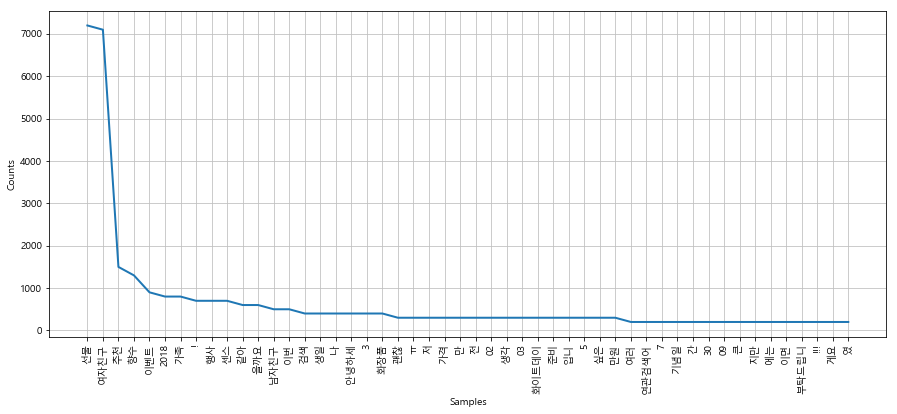

In [116]:
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

In [117]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

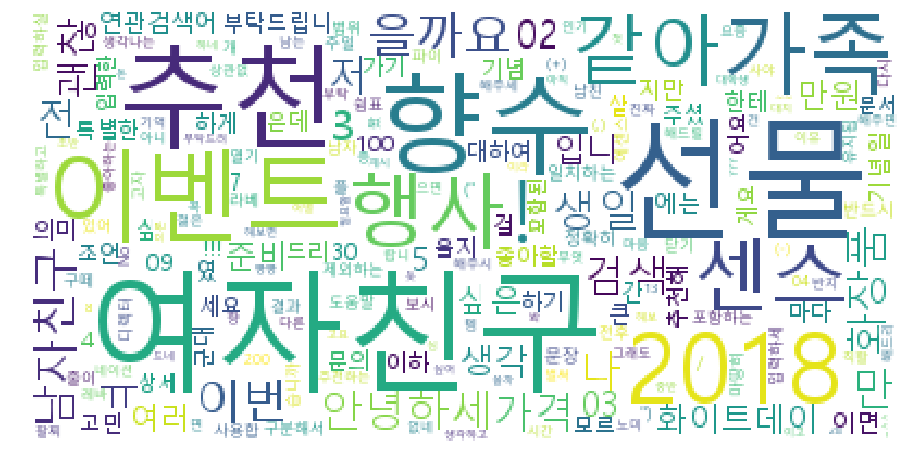

In [118]:
data = ko.vocab().most_common(300)

# for win : font_path='/Library/Fonts/AppleGothic.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [122]:
mask = np.array(Image.open('./data/09. heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [123]:
data = ko.vocab().most_common(200)

# for win : font_path='/Library/Fonts/AppleGothic.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

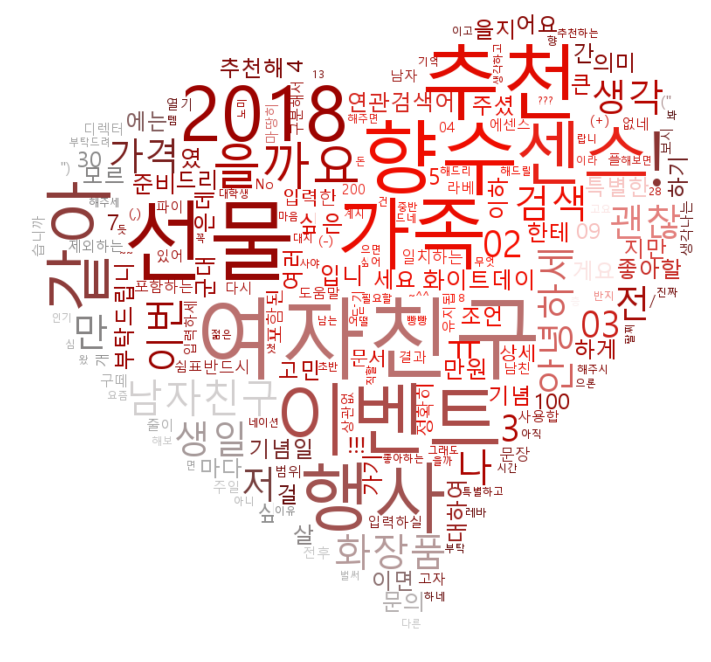

In [124]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

* gensim install : **pip install gensim**

In [126]:
import gensim
from gensim.models import word2vec

C:\Users\Sangwook\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [128]:
twitter = Twitter()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r= []
    
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
            
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)

기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 남자친구 이벤트 여자친구 선물 추천 플 라베 남친 생일 선물 여자친구 선물 구떼 향수 No 7 디렉터 파이 에센스 남자 선물 남자친구 생일 남자친구 200 일 선물 20 대다 여자친구 선물 남자친구 기념일 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 04 09 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 노미 네이션 여자친구 선물 추천 하다 이유 여자친구 선물 진짜 기억 남다 해주시 좋다 같다 반지 팔찌 답변 수 2
질문 20 대다 여자친구 선물 추천 좀 해주다 8 시간 전 안녕하다 20 대다 여자친구 선물 중 향수 괜찮다 있다 질문 하나 해드리다 1 20 대다 여자친구 선물 향수 추천 좀 ㅠ 2 여자친구 좋아하다 향 이다 답변 20 대다 여자친구 선물 향수 추천 좀 ㅠ 요즘 젊다 층 20 대다 여자친구 선물 도 인기 템 랍니 ㅎㅎ 4 저 레바 향수 20 대다 여자친구 선물 추천 해드리다 가족 행사 이벤트 답변 수 3
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 추

질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 추천 일 빵빵 기념일 2018 03 28 싶다 여자친구 선물 추천 필요하다 듯 하다 뭐 특별하다 여자친구 선물 추천 이면 좋다 30 대지 첫 없다 알다 센스 있다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 추천 해달라다 셧 데 일단 지금 100 일 기념 준비 하다 같다 100 일 기념 여자친구 선물 추천 좋다 같다 주변 지인 들 도 여자친구 선물 추천 하다 가족 행사 이벤트 답변 수 4
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장품 처음 주다 보다 거 이다 누나 물어보다 여자친구 선물 살 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 2017 11 29 여자친구 선물 뭘 해주다 여자친구 좋아하다 요 그래서 여자친구 선물 향수 무난 하다 해주다 하다 괜찮다 여자친구 선물 좋다 향수 어떻다 있다 답변 여자친구 선물 목걸이 시계 등 여러가지 같다 여자친구 선물 향수 생각 하다 것 같다 없이 여자친구 선물 도 좋다 또 여기 향수 향수 사랑 기초 화장품 답변 수 3
질문 센스 있다 여자친구 선물 좋다 것좀 ㅎ 2018 03 06 센스 있다 여자친구 선물 어떻다 있다 여자친구 이제 20 살다 이번 주 개강 하다 선물 겸 성인 되다 센스 있다 여자친구 선물 알다 

질문 여자친구 선물 2017 11 29 여자친구 선물 뭘 해주다 여자친구 좋아하다 요 그래서 여자친구 선물 향수 무난 하다 해주다 하다 괜찮다 여자친구 선물 좋다 향수 어떻다 있다 답변 여자친구 선물 목걸이 시계 등 여러가지 같다 여자친구 선물 향수 생각 하다 것 같다 없이 여자친구 선물 도 좋다 또 여기 향수 향수 사랑 기초 화장품 답변 수 3
질문 센스 있다 여자친구 선물 좋다 것좀 ㅎ 2018 03 06 센스 있다 여자친구 선물 어떻다 있다 여자친구 이제 20 살다 이번 주 개강 하다 선물 겸 성인 되다 센스 있다 여자친구 선물 알다 답변 안녕하다 센스 있다 여자친구 선물 대하다 문의 주다 센스 있다 여자친구 선물 되다 추천 드리다 싶다 센스 있다 여자친구 선물 향수 이다 향수 굉장하다 가족 행사 이벤트 답변 수 1
질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구 선물 대하다 문의 주다 먼저 20 대다 여자친구 선물 여러 모로 의미 깊다 20 대다 여자친구 선물 향수 추천 드리다 좋다 향기 좋다 가족 행사 이벤트 답변 수 3
질문 여자친구 선물 모르다 도와주다 2018 02 02 이번 여자친구 선물 해주다 싶다 어떻다 걸 좋아하다 싶다 여자친구 선물 어떻다 게 좋다 가격 대 5 만원 이하 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 고민 모든 남자친구 들 하다 마련 이 5 만원 이하 특별하다 여자친구 선물 아무래도 자주 같다 여자친구 선물 깜짝 이벤트 하다 좋다 것 가족 행사 이벤트 답변 수 7
질문 군대 가다 여자친구 선물 여자친구 2018 06 09 군대 가다 여자친구 선물 여자친구 가족 들 좀 챙기다 뭐 좋다 답변 여자친구 선물 준비 중 이 시 군 선물 귀걸이 좋다 요 이쁘다 기도 항상 차고 다닐떄 생각 나 그렇다 의미 있다 선물 좋다 거 같다 여자친

질문 여자친구 선물 모르다 도와주다 2018 02 02 이번 여자친구 선물 해주다 싶다 어떻다 걸 좋아하다 싶다 여자친구 선물 어떻다 게 좋다 가격 대 5 만원 이하 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 고민 모든 남자친구 들 하다 마련 이 5 만원 이하 특별하다 여자친구 선물 아무래도 자주 같다 여자친구 선물 깜짝 이벤트 하다 좋다 것 가족 행사 이벤트 답변 수 7
질문 군대 가다 여자친구 선물 여자친구 2018 06 09 군대 가다 여자친구 선물 여자친구 가족 들 좀 챙기다 뭐 좋다 답변 여자친구 선물 준비 중 이 시 군 선물 귀걸이 좋다 요 이쁘다 기도 항상 차고 다닐떄 생각 나 그렇다 의미 있다 선물 좋다 거 같다 여자친구 분 병영 생활 답변 수 3
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 남자친구 이벤트 여자친구 선물 추천 플 라베 남친 생일 선물 여자친구 선물 구떼 향수 No 7 디렉터 파이 에센스 남자 선물 남자친구 생일 남자친구 200 일 선물 20 대다 여자친구 선물 남자친구 기념일 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 04 09 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 노미 네이션 여자친구 선물 추천 하다 이유 여자친구 선물 진짜 기억 남다 해주시 좋다 같다 반지 팔찌 답변 수 2
질문 20 대다 여자친구 선물 추천 좀 해주다 8 시간 전 안녕하다 20 대다 여자친구 선물 중 향수 괜찮다 있다 질문 하나 해드리다 1 20 대다 여자친구 선물 향수 추천 좀 ㅠ 2

질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 04 09 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 노미 네이션 여자친구 선물 추천 하다 이유 여자친구 선물 진짜 기억 남다 해주시 좋다 같다 반지 팔찌 답변 수 2
질문 20 대다 여자친구 선물 추천 좀 해주다 8 시간 전 안녕하다 20 대다 여자친구 선물 중 향수 괜찮다 있다 질문 하나 해드리다 1 20 대다 여자친구 선물 향수 추천 좀 ㅠ 2 여자친구 좋아하다 향 이다 답변 20 대다 여자친구 선물 향수 추천 좀 ㅠ 요즘 젊다 층 20 대다 여자친구 선물 도 인기 템 랍니 ㅎㅎ 4 저 레바 향수 20 대다 여자친구 선물 추천 해드리다 가족 행사 이벤트 답변 수 3
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 추천 일 빵빵 기념일 2018 03 28 싶다 여자친구 선물 추천 필요하다 듯 하다 뭐 특별하다 여자친구 선물 추천 이면 좋다 30 대지 첫 없다 알다 센스 있다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 추천 해달라다 셧 데 일단 지금 100 일 기념 준비 하다 같다 100 일 기념 여자친구 선물 추천 좋다 같다 주변 지인 들 도 여자친구 선물 추천 하다 가족 행사 이벤트 답변 수 4
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발

질문 여자친구 선물 추천 일 빵빵 기념일 2018 03 28 싶다 여자친구 선물 추천 필요하다 듯 하다 뭐 특별하다 여자친구 선물 추천 이면 좋다 30 대지 첫 없다 알다 센스 있다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 추천 해달라다 셧 데 일단 지금 100 일 기념 준비 하다 같다 100 일 기념 여자친구 선물 추천 좋다 같다 주변 지인 들 도 여자친구 선물 추천 하다 가족 행사 이벤트 답변 수 4
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장품 처음 주다 보다 거 이다 누나 물어보다 여자친구 선물 살 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 2017 11 29 여자친구 선물 뭘 해주다 여자친구 좋아하다 요 그래서 여자친구 선물 향수 무난 하다 해주다 하다 괜찮다 여자친구 선물 좋다 향수 어떻다 있다 답변 여자친구 선물 목걸이 시계 등 여러가지 같다 여자친구 선물 향수 생각 하다 것 같다 없이 여자친구 선물 도 좋다 또 여기 향수 향수 사랑 기초 화장품 답변 수 3
질문 센스 있다 여자친구 선물 좋다 것좀 ㅎ 2018 03 06 센스 있다 여자친구 선물 어떻다 있다 여자친구 이제 20 살다 이번 주 개강 하다 선물 겸 성인 되다 센스 있다 여자친구 선물 알다 답변 안녕하다 센스 있다 여자친구 선물 대하다 문의 주다 센스 있다 여자친구 선물 되다 추천 드리다 싶다 센스 있다 여자친구 선물 향수 이다 향수 굉장하다 가족 행사 이벤트 답변 수 1
질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구

질문 센스 있다 여자친구 선물 좋다 것좀 ㅎ 2018 03 06 센스 있다 여자친구 선물 어떻다 있다 여자친구 이제 20 살다 이번 주 개강 하다 선물 겸 성인 되다 센스 있다 여자친구 선물 알다 답변 안녕하다 센스 있다 여자친구 선물 대하다 문의 주다 센스 있다 여자친구 선물 되다 추천 드리다 싶다 센스 있다 여자친구 선물 향수 이다 향수 굉장하다 가족 행사 이벤트 답변 수 1
질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구 선물 대하다 문의 주다 먼저 20 대다 여자친구 선물 여러 모로 의미 깊다 20 대다 여자친구 선물 향수 추천 드리다 좋다 향기 좋다 가족 행사 이벤트 답변 수 3
질문 여자친구 선물 모르다 도와주다 2018 02 02 이번 여자친구 선물 해주다 싶다 어떻다 걸 좋아하다 싶다 여자친구 선물 어떻다 게 좋다 가격 대 5 만원 이하 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 고민 모든 남자친구 들 하다 마련 이 5 만원 이하 특별하다 여자친구 선물 아무래도 자주 같다 여자친구 선물 깜짝 이벤트 하다 좋다 것 가족 행사 이벤트 답변 수 7
질문 군대 가다 여자친구 선물 여자친구 2018 06 09 군대 가다 여자친구 선물 여자친구 가족 들 좀 챙기다 뭐 좋다 답변 여자친구 선물 준비 중 이 시 군 선물 귀걸이 좋다 요 이쁘다 기도 항상 차고 다닐떄 생각 나 그렇다 의미 있다 선물 좋다 거 같다 여자친구 분 병영 생활 답변 수 3
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 남자친구 이벤트 여자친구 선물 추천 플 라베 남친 생일

질문 군대 가다 여자친구 선물 여자친구 2018 06 09 군대 가다 여자친구 선물 여자친구 가족 들 좀 챙기다 뭐 좋다 답변 여자친구 선물 준비 중 이 시 군 선물 귀걸이 좋다 요 이쁘다 기도 항상 차고 다닐떄 생각 나 그렇다 의미 있다 선물 좋다 거 같다 여자친구 분 병영 생활 답변 수 3
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 남자친구 이벤트 여자친구 선물 추천 플 라베 남친 생일 선물 여자친구 선물 구떼 향수 No 7 디렉터 파이 에센스 남자 선물 남자친구 생일 남자친구 200 일 선물 20 대다 여자친구 선물 남자친구 기념일 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 04 09 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 노미 네이션 여자친구 선물 추천 하다 이유 여자친구 선물 진짜 기억 남다 해주시 좋다 같다 반지 팔찌 답변 수 2
질문 20 대다 여자친구 선물 추천 좀 해주다 8 시간 전 안녕하다 20 대다 여자친구 선물 중 향수 괜찮다 있다 질문 하나 해드리다 1 20 대다 여자친구 선물 향수 추천 좀 ㅠ 2 여자친구 좋아하다 향 이다 답변 20 대다 여자친구 선물 향수 추천 좀 ㅠ 요즘 젊다 층 20 대다 여자친구 선물 도 인기 템 랍니 ㅎㅎ 4 저 레바 향수 20 대다 여자친구 선물 추천 해드리다 가족 행사 이벤트 답변 수 3
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 

질문 20 대다 여자친구 선물 추천 좀 해주다 8 시간 전 안녕하다 20 대다 여자친구 선물 중 향수 괜찮다 있다 질문 하나 해드리다 1 20 대다 여자친구 선물 향수 추천 좀 ㅠ 2 여자친구 좋아하다 향 이다 답변 20 대다 여자친구 선물 향수 추천 좀 ㅠ 요즘 젊다 층 20 대다 여자친구 선물 도 인기 템 랍니 ㅎㅎ 4 저 레바 향수 20 대다 여자친구 선물 추천 해드리다 가족 행사 이벤트 답변 수 3
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 추천 일 빵빵 기념일 2018 03 28 싶다 여자친구 선물 추천 필요하다 듯 하다 뭐 특별하다 여자친구 선물 추천 이면 좋다 30 대지 첫 없다 알다 센스 있다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 추천 해달라다 셧 데 일단 지금 100 일 기념 준비 하다 같다 100 일 기념 여자친구 선물 추천 좋다 같다 주변 지인 들 도 여자친구 선물 추천 하다 가족 행사 이벤트 답변 수 4
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장품 처음 주다 보다 거 이다 누나 물어보다 여자친구 선물 살 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 2017 11 29 여자친구 선물 뭘 해주다 여자친구 좋아하다 요 그래서 여자친구 선물 향수 무난 하다 해주다 하다 

질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장품 처음 주다 보다 거 이다 누나 물어보다 여자친구 선물 살 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 2017 11 29 여자친구 선물 뭘 해주다 여자친구 좋아하다 요 그래서 여자친구 선물 향수 무난 하다 해주다 하다 괜찮다 여자친구 선물 좋다 향수 어떻다 있다 답변 여자친구 선물 목걸이 시계 등 여러가지 같다 여자친구 선물 향수 생각 하다 것 같다 없이 여자친구 선물 도 좋다 또 여기 향수 향수 사랑 기초 화장품 답변 수 3
질문 센스 있다 여자친구 선물 좋다 것좀 ㅎ 2018 03 06 센스 있다 여자친구 선물 어떻다 있다 여자친구 이제 20 살다 이번 주 개강 하다 선물 겸 성인 되다 센스 있다 여자친구 선물 알다 답변 안녕하다 센스 있다 여자친구 선물 대하다 문의 주다 센스 있다 여자친구 선물 되다 추천 드리다 싶다 센스 있다 여자친구 선물 향수 이다 향수 굉장하다 가족 행사 이벤트 답변 수 1
질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구 선물 대하다 문의 주다 먼저 20 대다 여자친구 선물 여러 모로 의미 깊다 20 대다 여자친구 선물 향수 추천 드리다 좋다 향기 좋다 가족 행사 이벤트 답변 수 3
질문 여자친구 선물 모르다 도와주다 2018 02 02 이번 여자친구 선물 해주다 싶다 어떻다 걸 좋아하다 싶다 여자친구 선물 어떻다 게 좋다 가격 대 5 만원 이하 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 고민 모든 남자친구 들 하다 마련 

질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구 선물 대하다 문의 주다 먼저 20 대다 여자친구 선물 여러 모로 의미 깊다 20 대다 여자친구 선물 향수 추천 드리다 좋다 향기 좋다 가족 행사 이벤트 답변 수 3
질문 여자친구 선물 모르다 도와주다 2018 02 02 이번 여자친구 선물 해주다 싶다 어떻다 걸 좋아하다 싶다 여자친구 선물 어떻다 게 좋다 가격 대 5 만원 이하 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 고민 모든 남자친구 들 하다 마련 이 5 만원 이하 특별하다 여자친구 선물 아무래도 자주 같다 여자친구 선물 깜짝 이벤트 하다 좋다 것 가족 행사 이벤트 답변 수 7
질문 군대 가다 여자친구 선물 여자친구 2018 06 09 군대 가다 여자친구 선물 여자친구 가족 들 좀 챙기다 뭐 좋다 답변 여자친구 선물 준비 중 이 시 군 선물 귀걸이 좋다 요 이쁘다 기도 항상 차고 다닐떄 생각 나 그렇다 의미 있다 선물 좋다 거 같다 여자친구 분 병영 생활 답변 수 3
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 남자친구 이벤트 여자친구 선물 추천 플 라베 남친 생일 선물 여자친구 선물 구떼 향수 No 7 디렉터 파이 에센스 남자 선물 남자친구 생일 남자친구 200 일 선물 20 대다 여자친구 선물 남자친구 기념일 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 04 09 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만

연관검색어 도움말 남자친구 이벤트 여자친구 선물 추천 플 라베 남친 생일 선물 여자친구 선물 구떼 향수 No 7 디렉터 파이 에센스 남자 선물 남자친구 생일 남자친구 200 일 선물 20 대다 여자친구 선물 남자친구 기념일 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 04 09 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 노미 네이션 여자친구 선물 추천 하다 이유 여자친구 선물 진짜 기억 남다 해주시 좋다 같다 반지 팔찌 답변 수 2
질문 20 대다 여자친구 선물 추천 좀 해주다 8 시간 전 안녕하다 20 대다 여자친구 선물 중 향수 괜찮다 있다 질문 하나 해드리다 1 20 대다 여자친구 선물 향수 추천 좀 ㅠ 2 여자친구 좋아하다 향 이다 답변 20 대다 여자친구 선물 향수 추천 좀 ㅠ 요즘 젊다 층 20 대다 여자친구 선물 도 인기 템 랍니 ㅎㅎ 4 저 레바 향수 20 대다 여자친구 선물 추천 해드리다 가족 행사 이벤트 답변 수 3
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 추천 일 빵빵 기념일 2018 03 28 싶다 여자친구 선물 추천 필요하다 듯 하다 뭐 특별하다 여자친구 선물 추천 이면 좋다 30 대지 첫 없다 알다 센스 있다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 추천 해달라다 셧 데 일단 지금 10

질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 추천 일 빵빵 기념일 2018 03 28 싶다 여자친구 선물 추천 필요하다 듯 하다 뭐 특별하다 여자친구 선물 추천 이면 좋다 30 대지 첫 없다 알다 센스 있다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 추천 해달라다 셧 데 일단 지금 100 일 기념 준비 하다 같다 100 일 기념 여자친구 선물 추천 좋다 같다 주변 지인 들 도 여자친구 선물 추천 하다 가족 행사 이벤트 답변 수 4
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장품 처음 주다 보다 거 이다 누나 물어보다 여자친구 선물 살 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 2017 11 29 여자친구 선물 뭘 해주다 여자친구 좋아하다 요 그래서 여자친구 선물 향수 무난 하다 해주다 하다 괜찮다 여자친구 선물 좋다 향수 어떻다 있다 답변 여자친구 선물 목걸이 시계 등 여러가지 같다 여자친구 선물 향수 생각 하다 것 같다 없이 여자친구 선물 도 좋다 또 여기 향수 향수 사랑 기초 화장품 답변 수 3
질문 센스 있다 여자친구 선물 좋다 것좀 ㅎ 2018 03 06 센스 있다 여자친구 선물 어떻다 있다 여자친구 이제 20 살다 이번 주 개강 하다 선물 겸 성인 되다 센스 있다 여자친구 선물 알다 

질문 여자친구 선물 2017 11 29 여자친구 선물 뭘 해주다 여자친구 좋아하다 요 그래서 여자친구 선물 향수 무난 하다 해주다 하다 괜찮다 여자친구 선물 좋다 향수 어떻다 있다 답변 여자친구 선물 목걸이 시계 등 여러가지 같다 여자친구 선물 향수 생각 하다 것 같다 없이 여자친구 선물 도 좋다 또 여기 향수 향수 사랑 기초 화장품 답변 수 3
질문 센스 있다 여자친구 선물 좋다 것좀 ㅎ 2018 03 06 센스 있다 여자친구 선물 어떻다 있다 여자친구 이제 20 살다 이번 주 개강 하다 선물 겸 성인 되다 센스 있다 여자친구 선물 알다 답변 안녕하다 센스 있다 여자친구 선물 대하다 문의 주다 센스 있다 여자친구 선물 되다 추천 드리다 싶다 센스 있다 여자친구 선물 향수 이다 향수 굉장하다 가족 행사 이벤트 답변 수 1
질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구 선물 대하다 문의 주다 먼저 20 대다 여자친구 선물 여러 모로 의미 깊다 20 대다 여자친구 선물 향수 추천 드리다 좋다 향기 좋다 가족 행사 이벤트 답변 수 3
질문 여자친구 선물 모르다 도와주다 2018 02 02 이번 여자친구 선물 해주다 싶다 어떻다 걸 좋아하다 싶다 여자친구 선물 어떻다 게 좋다 가격 대 5 만원 이하 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 고민 모든 남자친구 들 하다 마련 이 5 만원 이하 특별하다 여자친구 선물 아무래도 자주 같다 여자친구 선물 깜짝 이벤트 하다 좋다 것 가족 행사 이벤트 답변 수 7
질문 군대 가다 여자친구 선물 여자친구 2018 06 09 군대 가다 여자친구 선물 여자친구 가족 들 좀 챙기다 뭐 좋다 답변 여자친구 선물 준비 중 이 시 군 선물 귀걸이 좋다 요 이쁘다 기도 항상 차고 다닐떄 생각 나 그렇다 의미 있다 선물 좋다 거 같다 여자친

질문 여자친구 선물 모르다 도와주다 2018 02 02 이번 여자친구 선물 해주다 싶다 어떻다 걸 좋아하다 싶다 여자친구 선물 어떻다 게 좋다 가격 대 5 만원 이하 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 고민 모든 남자친구 들 하다 마련 이 5 만원 이하 특별하다 여자친구 선물 아무래도 자주 같다 여자친구 선물 깜짝 이벤트 하다 좋다 것 가족 행사 이벤트 답변 수 7
질문 군대 가다 여자친구 선물 여자친구 2018 06 09 군대 가다 여자친구 선물 여자친구 가족 들 좀 챙기다 뭐 좋다 답변 여자친구 선물 준비 중 이 시 군 선물 귀걸이 좋다 요 이쁘다 기도 항상 차고 다닐떄 생각 나 그렇다 의미 있다 선물 좋다 거 같다 여자친구 분 병영 생활 답변 수 3
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 남자친구 이벤트 여자친구 선물 추천 플 라베 남친 생일 선물 여자친구 선물 구떼 향수 No 7 디렉터 파이 에센스 남자 선물 남자친구 생일 남자친구 200 일 선물 20 대다 여자친구 선물 남자친구 기념일 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 04 09 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 노미 네이션 여자친구 선물 추천 하다 이유 여자친구 선물 진짜 기억 남다 해주시 좋다 같다 반지 팔찌 답변 수 2
질문 20 대다 여자친구 선물 추천 좀 해주다 8 시간 전 안녕하다 20 대다 여자친구 선물 중 향수 괜찮다 있다 질문 하나 해드리다 1 20 대다 여자친구 선물 향수 추천 좀 ㅠ 2

질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 04 09 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 노미 네이션 여자친구 선물 추천 하다 이유 여자친구 선물 진짜 기억 남다 해주시 좋다 같다 반지 팔찌 답변 수 2
질문 20 대다 여자친구 선물 추천 좀 해주다 8 시간 전 안녕하다 20 대다 여자친구 선물 중 향수 괜찮다 있다 질문 하나 해드리다 1 20 대다 여자친구 선물 향수 추천 좀 ㅠ 2 여자친구 좋아하다 향 이다 답변 20 대다 여자친구 선물 향수 추천 좀 ㅠ 요즘 젊다 층 20 대다 여자친구 선물 도 인기 템 랍니 ㅎㅎ 4 저 레바 향수 20 대다 여자친구 선물 추천 해드리다 가족 행사 이벤트 답변 수 3
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 추천 일 빵빵 기념일 2018 03 28 싶다 여자친구 선물 추천 필요하다 듯 하다 뭐 특별하다 여자친구 선물 추천 이면 좋다 30 대지 첫 없다 알다 센스 있다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 추천 해달라다 셧 데 일단 지금 100 일 기념 준비 하다 같다 100 일 기념 여자친구 선물 추천 좋다 같다 주변 지인 들 도 여자친구 선물 추천 하다 가족 행사 이벤트 답변 수 4
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발

질문 여자친구 선물 추천 일 빵빵 기념일 2018 03 28 싶다 여자친구 선물 추천 필요하다 듯 하다 뭐 특별하다 여자친구 선물 추천 이면 좋다 30 대지 첫 없다 알다 센스 있다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 추천 해달라다 셧 데 일단 지금 100 일 기념 준비 하다 같다 100 일 기념 여자친구 선물 추천 좋다 같다 주변 지인 들 도 여자친구 선물 추천 하다 가족 행사 이벤트 답변 수 4
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장품 처음 주다 보다 거 이다 누나 물어보다 여자친구 선물 살 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 2017 11 29 여자친구 선물 뭘 해주다 여자친구 좋아하다 요 그래서 여자친구 선물 향수 무난 하다 해주다 하다 괜찮다 여자친구 선물 좋다 향수 어떻다 있다 답변 여자친구 선물 목걸이 시계 등 여러가지 같다 여자친구 선물 향수 생각 하다 것 같다 없이 여자친구 선물 도 좋다 또 여기 향수 향수 사랑 기초 화장품 답변 수 3
질문 센스 있다 여자친구 선물 좋다 것좀 ㅎ 2018 03 06 센스 있다 여자친구 선물 어떻다 있다 여자친구 이제 20 살다 이번 주 개강 하다 선물 겸 성인 되다 센스 있다 여자친구 선물 알다 답변 안녕하다 센스 있다 여자친구 선물 대하다 문의 주다 센스 있다 여자친구 선물 되다 추천 드리다 싶다 센스 있다 여자친구 선물 향수 이다 향수 굉장하다 가족 행사 이벤트 답변 수 1
질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구

질문 센스 있다 여자친구 선물 좋다 것좀 ㅎ 2018 03 06 센스 있다 여자친구 선물 어떻다 있다 여자친구 이제 20 살다 이번 주 개강 하다 선물 겸 성인 되다 센스 있다 여자친구 선물 알다 답변 안녕하다 센스 있다 여자친구 선물 대하다 문의 주다 센스 있다 여자친구 선물 되다 추천 드리다 싶다 센스 있다 여자친구 선물 향수 이다 향수 굉장하다 가족 행사 이벤트 답변 수 1
질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구 선물 대하다 문의 주다 먼저 20 대다 여자친구 선물 여러 모로 의미 깊다 20 대다 여자친구 선물 향수 추천 드리다 좋다 향기 좋다 가족 행사 이벤트 답변 수 3
질문 여자친구 선물 모르다 도와주다 2018 02 02 이번 여자친구 선물 해주다 싶다 어떻다 걸 좋아하다 싶다 여자친구 선물 어떻다 게 좋다 가격 대 5 만원 이하 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 고민 모든 남자친구 들 하다 마련 이 5 만원 이하 특별하다 여자친구 선물 아무래도 자주 같다 여자친구 선물 깜짝 이벤트 하다 좋다 것 가족 행사 이벤트 답변 수 7
질문 군대 가다 여자친구 선물 여자친구 2018 06 09 군대 가다 여자친구 선물 여자친구 가족 들 좀 챙기다 뭐 좋다 답변 여자친구 선물 준비 중 이 시 군 선물 귀걸이 좋다 요 이쁘다 기도 항상 차고 다닐떄 생각 나 그렇다 의미 있다 선물 좋다 거 같다 여자친구 분 병영 생활 답변 수 3
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 남자친구 이벤트 여자친구 선물 추천 플 라베 남친 생일

질문 군대 가다 여자친구 선물 여자친구 2018 06 09 군대 가다 여자친구 선물 여자친구 가족 들 좀 챙기다 뭐 좋다 답변 여자친구 선물 준비 중 이 시 군 선물 귀걸이 좋다 요 이쁘다 기도 항상 차고 다닐떄 생각 나 그렇다 의미 있다 선물 좋다 거 같다 여자친구 분 병영 생활 답변 수 3
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 남자친구 이벤트 여자친구 선물 추천 플 라베 남친 생일 선물 여자친구 선물 구떼 향수 No 7 디렉터 파이 에센스 남자 선물 남자친구 생일 남자친구 200 일 선물 20 대다 여자친구 선물 남자친구 기념일 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 04 09 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 노미 네이션 여자친구 선물 추천 하다 이유 여자친구 선물 진짜 기억 남다 해주시 좋다 같다 반지 팔찌 답변 수 2
질문 20 대다 여자친구 선물 추천 좀 해주다 8 시간 전 안녕하다 20 대다 여자친구 선물 중 향수 괜찮다 있다 질문 하나 해드리다 1 20 대다 여자친구 선물 향수 추천 좀 ㅠ 2 여자친구 좋아하다 향 이다 답변 20 대다 여자친구 선물 향수 추천 좀 ㅠ 요즘 젊다 층 20 대다 여자친구 선물 도 인기 템 랍니 ㅎㅎ 4 저 레바 향수 20 대다 여자친구 선물 추천 해드리다 가족 행사 이벤트 답변 수 3
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 

질문 20 대다 여자친구 선물 추천 좀 해주다 8 시간 전 안녕하다 20 대다 여자친구 선물 중 향수 괜찮다 있다 질문 하나 해드리다 1 20 대다 여자친구 선물 향수 추천 좀 ㅠ 2 여자친구 좋아하다 향 이다 답변 20 대다 여자친구 선물 향수 추천 좀 ㅠ 요즘 젊다 층 20 대다 여자친구 선물 도 인기 템 랍니 ㅎㅎ 4 저 레바 향수 20 대다 여자친구 선물 추천 해드리다 가족 행사 이벤트 답변 수 3
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 추천 일 빵빵 기념일 2018 03 28 싶다 여자친구 선물 추천 필요하다 듯 하다 뭐 특별하다 여자친구 선물 추천 이면 좋다 30 대지 첫 없다 알다 센스 있다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 추천 해달라다 셧 데 일단 지금 100 일 기념 준비 하다 같다 100 일 기념 여자친구 선물 추천 좋다 같다 주변 지인 들 도 여자친구 선물 추천 하다 가족 행사 이벤트 답변 수 4
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장품 처음 주다 보다 거 이다 누나 물어보다 여자친구 선물 살 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 2017 11 29 여자친구 선물 뭘 해주다 여자친구 좋아하다 요 그래서 여자친구 선물 향수 무난 하다 해주다 하다 

질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장품 처음 주다 보다 거 이다 누나 물어보다 여자친구 선물 살 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 2017 11 29 여자친구 선물 뭘 해주다 여자친구 좋아하다 요 그래서 여자친구 선물 향수 무난 하다 해주다 하다 괜찮다 여자친구 선물 좋다 향수 어떻다 있다 답변 여자친구 선물 목걸이 시계 등 여러가지 같다 여자친구 선물 향수 생각 하다 것 같다 없이 여자친구 선물 도 좋다 또 여기 향수 향수 사랑 기초 화장품 답변 수 3
질문 센스 있다 여자친구 선물 좋다 것좀 ㅎ 2018 03 06 센스 있다 여자친구 선물 어떻다 있다 여자친구 이제 20 살다 이번 주 개강 하다 선물 겸 성인 되다 센스 있다 여자친구 선물 알다 답변 안녕하다 센스 있다 여자친구 선물 대하다 문의 주다 센스 있다 여자친구 선물 되다 추천 드리다 싶다 센스 있다 여자친구 선물 향수 이다 향수 굉장하다 가족 행사 이벤트 답변 수 1
질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구 선물 대하다 문의 주다 먼저 20 대다 여자친구 선물 여러 모로 의미 깊다 20 대다 여자친구 선물 향수 추천 드리다 좋다 향기 좋다 가족 행사 이벤트 답변 수 3
질문 여자친구 선물 모르다 도와주다 2018 02 02 이번 여자친구 선물 해주다 싶다 어떻다 걸 좋아하다 싶다 여자친구 선물 어떻다 게 좋다 가격 대 5 만원 이하 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 고민 모든 남자친구 들 하다 마련 

질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구 선물 대하다 문의 주다 먼저 20 대다 여자친구 선물 여러 모로 의미 깊다 20 대다 여자친구 선물 향수 추천 드리다 좋다 향기 좋다 가족 행사 이벤트 답변 수 3
질문 여자친구 선물 모르다 도와주다 2018 02 02 이번 여자친구 선물 해주다 싶다 어떻다 걸 좋아하다 싶다 여자친구 선물 어떻다 게 좋다 가격 대 5 만원 이하 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 고민 모든 남자친구 들 하다 마련 이 5 만원 이하 특별하다 여자친구 선물 아무래도 자주 같다 여자친구 선물 깜짝 이벤트 하다 좋다 것 가족 행사 이벤트 답변 수 7
질문 군대 가다 여자친구 선물 여자친구 2018 06 09 군대 가다 여자친구 선물 여자친구 가족 들 좀 챙기다 뭐 좋다 답변 여자친구 선물 준비 중 이 시 군 선물 귀걸이 좋다 요 이쁘다 기도 항상 차고 다닐떄 생각 나 그렇다 의미 있다 선물 좋다 거 같다 여자친구 분 병영 생활 답변 수 3
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 남자친구 이벤트 여자친구 선물 추천 플 라베 남친 생일 선물 여자친구 선물 구떼 향수 No 7 디렉터 파이 에센스 남자 선물 남자친구 생일 남자친구 200 일 선물 20 대다 여자친구 선물 남자친구 기념일 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 04 09 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만

연관검색어 도움말 남자친구 이벤트 여자친구 선물 추천 플 라베 남친 생일 선물 여자친구 선물 구떼 향수 No 7 디렉터 파이 에센스 남자 선물 남자친구 생일 남자친구 200 일 선물 20 대다 여자친구 선물 남자친구 기념일 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 04 09 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 노미 네이션 여자친구 선물 추천 하다 이유 여자친구 선물 진짜 기억 남다 해주시 좋다 같다 반지 팔찌 답변 수 2
질문 20 대다 여자친구 선물 추천 좀 해주다 8 시간 전 안녕하다 20 대다 여자친구 선물 중 향수 괜찮다 있다 질문 하나 해드리다 1 20 대다 여자친구 선물 향수 추천 좀 ㅠ 2 여자친구 좋아하다 향 이다 답변 20 대다 여자친구 선물 향수 추천 좀 ㅠ 요즘 젊다 층 20 대다 여자친구 선물 도 인기 템 랍니 ㅎㅎ 4 저 레바 향수 20 대다 여자친구 선물 추천 해드리다 가족 행사 이벤트 답변 수 3
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 추천 일 빵빵 기념일 2018 03 28 싶다 여자친구 선물 추천 필요하다 듯 하다 뭐 특별하다 여자친구 선물 추천 이면 좋다 30 대지 첫 없다 알다 센스 있다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 추천 해달라다 셧 데 일단 지금 10

질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 추천 일 빵빵 기념일 2018 03 28 싶다 여자친구 선물 추천 필요하다 듯 하다 뭐 특별하다 여자친구 선물 추천 이면 좋다 30 대지 첫 없다 알다 센스 있다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 추천 해달라다 셧 데 일단 지금 100 일 기념 준비 하다 같다 100 일 기념 여자친구 선물 추천 좋다 같다 주변 지인 들 도 여자친구 선물 추천 하다 가족 행사 이벤트 답변 수 4
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장품 처음 주다 보다 거 이다 누나 물어보다 여자친구 선물 살 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 2017 11 29 여자친구 선물 뭘 해주다 여자친구 좋아하다 요 그래서 여자친구 선물 향수 무난 하다 해주다 하다 괜찮다 여자친구 선물 좋다 향수 어떻다 있다 답변 여자친구 선물 목걸이 시계 등 여러가지 같다 여자친구 선물 향수 생각 하다 것 같다 없이 여자친구 선물 도 좋다 또 여기 향수 향수 사랑 기초 화장품 답변 수 3
질문 센스 있다 여자친구 선물 좋다 것좀 ㅎ 2018 03 06 센스 있다 여자친구 선물 어떻다 있다 여자친구 이제 20 살다 이번 주 개강 하다 선물 겸 성인 되다 센스 있다 여자친구 선물 알다 

질문 여자친구 선물 2017 11 29 여자친구 선물 뭘 해주다 여자친구 좋아하다 요 그래서 여자친구 선물 향수 무난 하다 해주다 하다 괜찮다 여자친구 선물 좋다 향수 어떻다 있다 답변 여자친구 선물 목걸이 시계 등 여러가지 같다 여자친구 선물 향수 생각 하다 것 같다 없이 여자친구 선물 도 좋다 또 여기 향수 향수 사랑 기초 화장품 답변 수 3
질문 센스 있다 여자친구 선물 좋다 것좀 ㅎ 2018 03 06 센스 있다 여자친구 선물 어떻다 있다 여자친구 이제 20 살다 이번 주 개강 하다 선물 겸 성인 되다 센스 있다 여자친구 선물 알다 답변 안녕하다 센스 있다 여자친구 선물 대하다 문의 주다 센스 있다 여자친구 선물 되다 추천 드리다 싶다 센스 있다 여자친구 선물 향수 이다 향수 굉장하다 가족 행사 이벤트 답변 수 1
질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구 선물 대하다 문의 주다 먼저 20 대다 여자친구 선물 여러 모로 의미 깊다 20 대다 여자친구 선물 향수 추천 드리다 좋다 향기 좋다 가족 행사 이벤트 답변 수 3
질문 여자친구 선물 모르다 도와주다 2018 02 02 이번 여자친구 선물 해주다 싶다 어떻다 걸 좋아하다 싶다 여자친구 선물 어떻다 게 좋다 가격 대 5 만원 이하 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 고민 모든 남자친구 들 하다 마련 이 5 만원 이하 특별하다 여자친구 선물 아무래도 자주 같다 여자친구 선물 깜짝 이벤트 하다 좋다 것 가족 행사 이벤트 답변 수 7
질문 군대 가다 여자친구 선물 여자친구 2018 06 09 군대 가다 여자친구 선물 여자친구 가족 들 좀 챙기다 뭐 좋다 답변 여자친구 선물 준비 중 이 시 군 선물 귀걸이 좋다 요 이쁘다 기도 항상 차고 다닐떄 생각 나 그렇다 의미 있다 선물 좋다 거 같다 여자친

질문 여자친구 선물 모르다 도와주다 2018 02 02 이번 여자친구 선물 해주다 싶다 어떻다 걸 좋아하다 싶다 여자친구 선물 어떻다 게 좋다 가격 대 5 만원 이하 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 고민 모든 남자친구 들 하다 마련 이 5 만원 이하 특별하다 여자친구 선물 아무래도 자주 같다 여자친구 선물 깜짝 이벤트 하다 좋다 것 가족 행사 이벤트 답변 수 7
질문 군대 가다 여자친구 선물 여자친구 2018 06 09 군대 가다 여자친구 선물 여자친구 가족 들 좀 챙기다 뭐 좋다 답변 여자친구 선물 준비 중 이 시 군 선물 귀걸이 좋다 요 이쁘다 기도 항상 차고 다닐떄 생각 나 그렇다 의미 있다 선물 좋다 거 같다 여자친구 분 병영 생활 답변 수 3
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 남자친구 이벤트 여자친구 선물 추천 플 라베 남친 생일 선물 여자친구 선물 구떼 향수 No 7 디렉터 파이 에센스 남자 선물 남자친구 생일 남자친구 200 일 선물 20 대다 여자친구 선물 남자친구 기념일 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 04 09 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 노미 네이션 여자친구 선물 추천 하다 이유 여자친구 선물 진짜 기억 남다 해주시 좋다 같다 반지 팔찌 답변 수 2
질문 20 대다 여자친구 선물 추천 좀 해주다 8 시간 전 안녕하다 20 대다 여자친구 선물 중 향수 괜찮다 있다 질문 하나 해드리다 1 20 대다 여자친구 선물 향수 추천 좀 ㅠ 2

질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 04 09 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 노미 네이션 여자친구 선물 추천 하다 이유 여자친구 선물 진짜 기억 남다 해주시 좋다 같다 반지 팔찌 답변 수 2
질문 20 대다 여자친구 선물 추천 좀 해주다 8 시간 전 안녕하다 20 대다 여자친구 선물 중 향수 괜찮다 있다 질문 하나 해드리다 1 20 대다 여자친구 선물 향수 추천 좀 ㅠ 2 여자친구 좋아하다 향 이다 답변 20 대다 여자친구 선물 향수 추천 좀 ㅠ 요즘 젊다 층 20 대다 여자친구 선물 도 인기 템 랍니 ㅎㅎ 4 저 레바 향수 20 대다 여자친구 선물 추천 해드리다 가족 행사 이벤트 답변 수 3
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 추천 일 빵빵 기념일 2018 03 28 싶다 여자친구 선물 추천 필요하다 듯 하다 뭐 특별하다 여자친구 선물 추천 이면 좋다 30 대지 첫 없다 알다 센스 있다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 추천 해달라다 셧 데 일단 지금 100 일 기념 준비 하다 같다 100 일 기념 여자친구 선물 추천 좋다 같다 주변 지인 들 도 여자친구 선물 추천 하다 가족 행사 이벤트 답변 수 4
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발

질문 여자친구 선물 추천 일 빵빵 기념일 2018 03 28 싶다 여자친구 선물 추천 필요하다 듯 하다 뭐 특별하다 여자친구 선물 추천 이면 좋다 30 대지 첫 없다 알다 센스 있다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 추천 해달라다 셧 데 일단 지금 100 일 기념 준비 하다 같다 100 일 기념 여자친구 선물 추천 좋다 같다 주변 지인 들 도 여자친구 선물 추천 하다 가족 행사 이벤트 답변 수 4
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장품 처음 주다 보다 거 이다 누나 물어보다 여자친구 선물 살 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 2017 11 29 여자친구 선물 뭘 해주다 여자친구 좋아하다 요 그래서 여자친구 선물 향수 무난 하다 해주다 하다 괜찮다 여자친구 선물 좋다 향수 어떻다 있다 답변 여자친구 선물 목걸이 시계 등 여러가지 같다 여자친구 선물 향수 생각 하다 것 같다 없이 여자친구 선물 도 좋다 또 여기 향수 향수 사랑 기초 화장품 답변 수 3
질문 센스 있다 여자친구 선물 좋다 것좀 ㅎ 2018 03 06 센스 있다 여자친구 선물 어떻다 있다 여자친구 이제 20 살다 이번 주 개강 하다 선물 겸 성인 되다 센스 있다 여자친구 선물 알다 답변 안녕하다 센스 있다 여자친구 선물 대하다 문의 주다 센스 있다 여자친구 선물 되다 추천 드리다 싶다 센스 있다 여자친구 선물 향수 이다 향수 굉장하다 가족 행사 이벤트 답변 수 1
질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구

질문 센스 있다 여자친구 선물 좋다 것좀 ㅎ 2018 03 06 센스 있다 여자친구 선물 어떻다 있다 여자친구 이제 20 살다 이번 주 개강 하다 선물 겸 성인 되다 센스 있다 여자친구 선물 알다 답변 안녕하다 센스 있다 여자친구 선물 대하다 문의 주다 센스 있다 여자친구 선물 되다 추천 드리다 싶다 센스 있다 여자친구 선물 향수 이다 향수 굉장하다 가족 행사 이벤트 답변 수 1
질문 20 대다 여자친구 선물 어떻다 좋다 2018 01 24 안녕하다 20 대다 여자친구 선물 고민 중 이다 어떻다 걸 골르다 야하다 모르다 가격 10 만원 안 넘어가다 루 20 대다 여자친구 선물 추천 하다 답변 안녕하다 20 대다 여자친구 선물 대하다 문의 주다 먼저 20 대다 여자친구 선물 여러 모로 의미 깊다 20 대다 여자친구 선물 향수 추천 드리다 좋다 향기 좋다 가족 행사 이벤트 답변 수 3
질문 여자친구 선물 모르다 도와주다 2018 02 02 이번 여자친구 선물 해주다 싶다 어떻다 걸 좋아하다 싶다 여자친구 선물 어떻다 게 좋다 가격 대 5 만원 이하 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 고민 모든 남자친구 들 하다 마련 이 5 만원 이하 특별하다 여자친구 선물 아무래도 자주 같다 여자친구 선물 깜짝 이벤트 하다 좋다 것 가족 행사 이벤트 답변 수 7
질문 군대 가다 여자친구 선물 여자친구 2018 06 09 군대 가다 여자친구 선물 여자친구 가족 들 좀 챙기다 뭐 좋다 답변 여자친구 선물 준비 중 이 시 군 선물 귀걸이 좋다 요 이쁘다 기도 항상 차고 다닐떄 생각 나 그렇다 의미 있다 선물 좋다 거 같다 여자친구 분 병영 생활 답변 수 3
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 남자친구 이벤트 여자친구 선물 추천 플 라베 남친 생일

질문 군대 가다 여자친구 선물 여자친구 2018 06 09 군대 가다 여자친구 선물 여자친구 가족 들 좀 챙기다 뭐 좋다 답변 여자친구 선물 준비 중 이 시 군 선물 귀걸이 좋다 요 이쁘다 기도 항상 차고 다닐떄 생각 나 그렇다 의미 있다 선물 좋다 거 같다 여자친구 분 병영 생활 답변 수 3
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 남자친구 이벤트 여자친구 선물 추천 플 라베 남친 생일 선물 여자친구 선물 구떼 향수 No 7 디렉터 파이 에센스 남자 선물 남자친구 생일 남자친구 200 일 선물 20 대다 여자친구 선물 남자친구 기념일 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 30 대다 전후 여자친구 선물 괜찮다 거 있다 2018 04 09 마땅하다 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 추천 좀 꼭 부탁드리다 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 노미 네이션 여자친구 선물 추천 하다 이유 여자친구 선물 진짜 기억 남다 해주시 좋다 같다 반지 팔찌 답변 수 2
질문 20 대다 여자친구 선물 추천 좀 해주다 8 시간 전 안녕하다 20 대다 여자친구 선물 중 향수 괜찮다 있다 질문 하나 해드리다 1 20 대다 여자친구 선물 향수 추천 좀 ㅠ 2 여자친구 좋아하다 향 이다 답변 20 대다 여자친구 선물 향수 추천 좀 ㅠ 요즘 젊다 층 20 대다 여자친구 선물 도 인기 템 랍니 ㅎㅎ 4 저 레바 향수 20 대다 여자친구 선물 추천 해드리다 가족 행사 이벤트 답변 수 3
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 

질문 20 대다 여자친구 선물 추천 좀 해주다 8 시간 전 안녕하다 20 대다 여자친구 선물 중 향수 괜찮다 있다 질문 하나 해드리다 1 20 대다 여자친구 선물 향수 추천 좀 ㅠ 2 여자친구 좋아하다 향 이다 답변 20 대다 여자친구 선물 향수 추천 좀 ㅠ 요즘 젊다 층 20 대다 여자친구 선물 도 인기 템 랍니 ㅎㅎ 4 저 레바 향수 20 대다 여자친구 선물 추천 해드리다 가족 행사 이벤트 답변 수 3
질문 20 대다 여자친구 선물 조언 부탁 2018 02 13 다르다 아니다 20 대다 여자친구 선물 무엇 해주다 좋다 조언 부탁드리다 20 대다 초반 20 대다 여자친구 선물 아직 대학생 20 대다 여자친구 선물 크다 돈 답변 20 대다 여자친구 선물 생각 하다 계시 봐 저 20 대다 중반 20 대다 여자친구 선물 뭐 있다 생각 해보다 20 대다 여자친구 선물 화장품 해보다 심 어떻다 생각 드네 가족 행사 이벤트 답변 수 1
질문 여자친구 선물 추천 일 빵빵 기념일 2018 03 28 싶다 여자친구 선물 추천 필요하다 듯 하다 뭐 특별하다 여자친구 선물 추천 이면 좋다 30 대지 첫 없다 알다 센스 있다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 추천 해달라다 셧 데 일단 지금 100 일 기념 준비 하다 같다 100 일 기념 여자친구 선물 추천 좋다 같다 주변 지인 들 도 여자친구 선물 추천 하다 가족 행사 이벤트 답변 수 4
질문 여자친구 선물 화이트데이 준비 중 2018 03 10 화이트데이 줄 여자친구 선물 준비 중 이다 여자친구 선물 뭐 좋다 팁 좀 저번 발렌타인데이 때 워낙 거 하다 챙기다 받다 가지 이번 화이트데이 여자친구 선물 답변 제 이번 생일 준 여자친구 선물 천연 성분 만들어지다 화장품 이다 여자친구 선물 화장품 처음 주다 보다 거 이다 누나 물어보다 여자친구 선물 살 가족 행사 이벤트 답변 수 5
질문 여자친구 선물 2017 11 29 여자친구 선물 뭘 해주다 여자친구 좋아하다 요 그래서 여자친구 선물 향수 무난 하다 해주다 하다 

In [129]:
data_file = 'pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))

In [130]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, 
                                                                        min_count=2, sg=1)
model.save('pres_girl.model')

In [131]:
model = word2vec.Word2Vec.load("pres_girl.model")

In [132]:
model.most_similar(positive=['선물'])

C:\Users\Sangwook\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('여자친구', 0.7241944670677185),
 ('좋다', 0.3918900489807129),
 ('답변', 0.3662930727005005),
 ('디렉터', 0.32277974486351013),
 ('에센스', 0.3032224178314209),
 ('라베', 0.2935241460800171),
 ('No', 0.2848125696182251),
 ('20', 0.2819899916648865),
 ('파이', 0.28037229180336),
 ('향수', 0.27574053406715393)]

In [133]:
model.most_similar(positive=['여자친구'])

C:\Users\Sangwook\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('선물', 0.7241944670677185),
 ('답변', 0.41073739528656006),
 ('좋다', 0.39783841371536255),
 ('2018', 0.30643683671951294),
 ('추천', 0.30633345246315),
 ('이쁘다', 0.2733813226222992),
 ('질문', 0.2706264853477478),
 ('향수', 0.2634373903274536),
 ('초반', 0.2620590925216675),
 ('디렉터', 0.26103389263153076)]